In [1]:
from IPython.core.display import display, HTML
toggle_code_str = '''
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Toggle Code"></form>
'''

toggle_code_prepare_str = '''
    <script>
    function code_toggle() {
        if ($('div.cell.code_cell.rendered.selected div.input').css('display')!='none'){
            $('div.cell.code_cell.rendered.selected div.input').hide();
        } else {
            $('div.cell.code_cell.rendered.selected div.input').show();
        }
    }
    </script>

'''

display(HTML(toggle_code_prepare_str + toggle_code_str))

def toggle_code():
    display(HTML(toggle_code_str))

C:\Users\rahul gupta\AppData\Local\Temp\ipykernel_19424\445671811.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# Classification functions in sci-kit learn

#### There are broadly two types of APIs based on their functionality:

1. Generic 
   - SGD classifier
      * Uses gradientdescent for optimization
      * Need to specify loss function

2. Specific
	- Logistic regression
	- Perceptron
	- Ridge classifier (for LSC)
	- K-nearest neighbours (KNNs)
	- Support vector machines(SVMs)
	- Naive Bayes
		* Specialized solvers for optimization

#### The following methods remain same across all classifiers: 
- Model training
   * fit(X, y[, coef_init, intercept_init, …])

- Prediction
  * predict(X) predicts class label for samples
  * decision_function(X) predicts confidence score for samples

- Evaluation
  * score(X, y[, sample_weight]) returns the mean accuracy on the given test data and labels

#### There a few common miscellaneous methods as follows:

- get_params([deep]) gets parameter for this estimator.


- set_params(**params) sets the parameters of this estimator.


- densify() converts coefficient matrix to dense array format.


- sparsify() converts coefficient matrix to sparse format.

## RidgeClassifier

RidgeClassifier is a classifier variant of the Ridge regressor.

**Binary classification:**
> **Ridge classifier first converts binary targets to {-1, 1} and then treats the problem as a regression task, optimizing the objective of regressor**

   - Minimize a penalized residual sum of squares <br>
	****min(w)||Xw-Y||<sup>2</sup> + α||w||<sup>2</sup>****

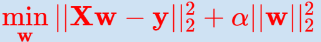

<br>

   * sklearn provides different `solvers` for this optimization
   * sklearn uses to denote regularization rate
   * predicted class corresponds to the sign of the regressor’s
    prediction


### Multiclass Classification : 
1. treated as multi-output regression
2. predicted class corresponds to the output with the highest value

##### Regularization rate is specified by using a positive `α` value during initializing RidgeClassifier. Larger values of `α` imply stronger regularization
Default value is `α = 0.1`

In [ ]:
# Step 1: Instantiate a classification estimator without passing any arguments to it.
# This creates a ridge classifier object.
from sklearn.linear_model import RidgeClassifier
ridg = RidgeClassifier()

# Step 2: Call fit method on ridge classifier object with training feature matrix and label vector as arguments.

# Note: The model is fitted using X_train and y_train.

ridge_classifier.fit(X_train, y_train)

### How to solve optimization problem in RidgeClassifier?

#### Using one of the following solvers

> `svd` - uses a Singular Value Decomposition of the feature matrix to compute the Ridge coefficients.
<br>
> `cholesky` - uses **scipy.linalg.solve** function to obtain the closed-form solution
<br>
> `sparse_cg` - uses the conjugate gradient solver of **scipy.sparse.linalg.cg**.
<br>
> `lsqr` - uses the dedicated regularized least-squares routine **scipy.sparse.linalg.lsqr** and it is **fastest**.
<br>
> `sag , saga` - uses a Stochastic Average Gradient descent iterative procedure 'saga' is unbiased and more flexible version of 'sag'
<br>
> `lbfgs` - uses L-BFGS-B algorithm implemented in **scipy.optimize.minimize**, can be used only when coefficients are forced to be positive.
> `auto` - Use auto to let RidgeClassifier automatically select the solver. This is the default.

### Uses of solver in RidgeClassifier

1. For large scale data, use `sparse_cg` solver.

When both n_samples and n_features are large, use `sag` or `saga` solvers.

**Note that fast convergence is only guaranteed on features with approximately the same scale.**








#### If the data is already centered, set parameter fit_intercept to False


In [ ]:
#Default : 
ridge_classifier = RidgeClassifier(fit_intercept=True)

> **RidgeClassifierCV** implements **RidgeClassifier** with built-in **cross validation**.

Both RidgeClassifierCV and RidgeClassifier can be used with binary/multinomial or even multi-label problems

## Perceptron()

1. It is a simple classification algorithm suitable for large-scale learning.
2. **It uses the same underlying implementation as SGDClassifier and is typically used for large-scale learning.**

> **Perceptron()** <br>
|<br>|<br>Is same as<br>|<br>|<br>
**SGDClassifier(loss = 'perceptron', eta0=1, learning_rate="constant", penalty=None)**

Perceptron uses SGD for training.

In [ ]:
# Have same implementation

from sklearn.linear_model import Perceptron
perceptron_classifier = Perceptron()
perceptron_classifier.fit(X_train, y_train)

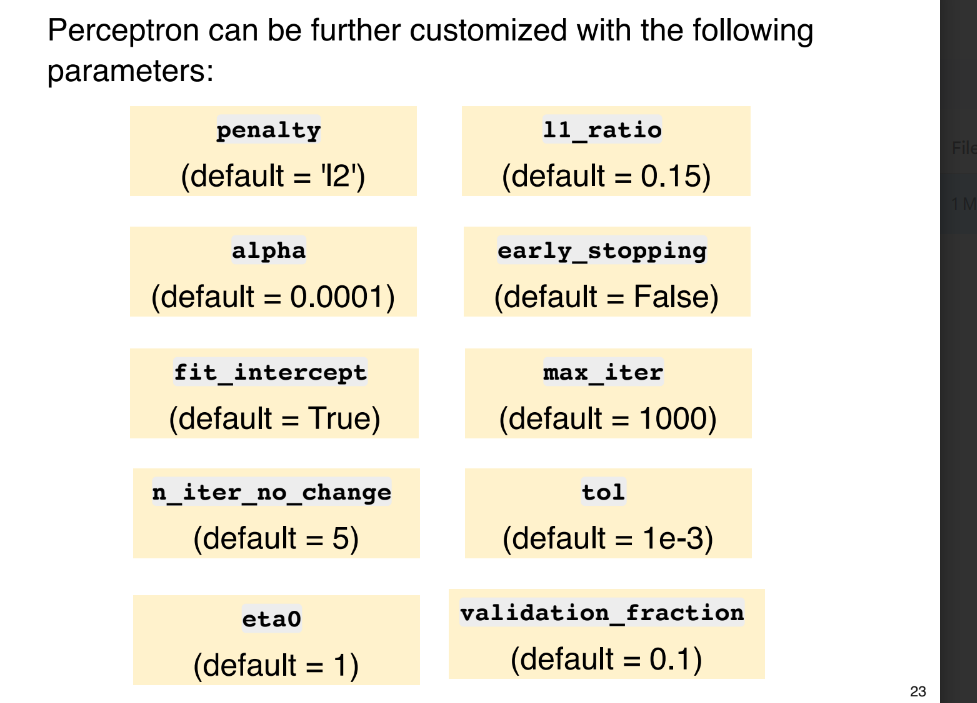

1. Perceptron classifier can be trained in an iterative manner with `partial_fit method`.
<br>

2. Perceptron classifier can be initialized to the weights of the previous run by specifying `warm_start = True` in the constructor.
<br>

3. Can be used with binary/multinomial classification. It supports multinomial classification by combining multiple binary classifiers using one-vs-all scheme, and devising a suitable scoring metric

## LogisticRegression API

*Implements logistic regression classifier, which is also known by a few different names like `logit regression`, `maximum entropy classifier (maxent)` and `log-linear classifier`.*

> ### arg min(w,C) regularization penalty + C*cross entropy loss

**NOTE: C is the inverse of the regularization rate λ, and must be positive; larger C implies weaker regularization, and smaller C implies stronger regularization**


*This implementation can fit:*
- binary classification
- one-vs-rest (OVR)
- multinomial logistic regression

**Provision for l1, l2 or elastic-net regularization**


In [ ]:
# Have same implementation 
from sklearn.linear_model import LogisticRegression
logit_classifier = LogisticRegression()

# Model training with feature matrix X_train and
# label vector or matrix y_train
logit_classifier.fit(X_train, y_train)

- Can be used with binary/ multinomial classification, and one-vs-rest (OVR)

Logistic regression uses specific algorithms for solving the optimization problem in training. These algorithms are known as solvers.

The choice of the solver depends on the classification problem set up such as size of the dataset, number of features and labels.

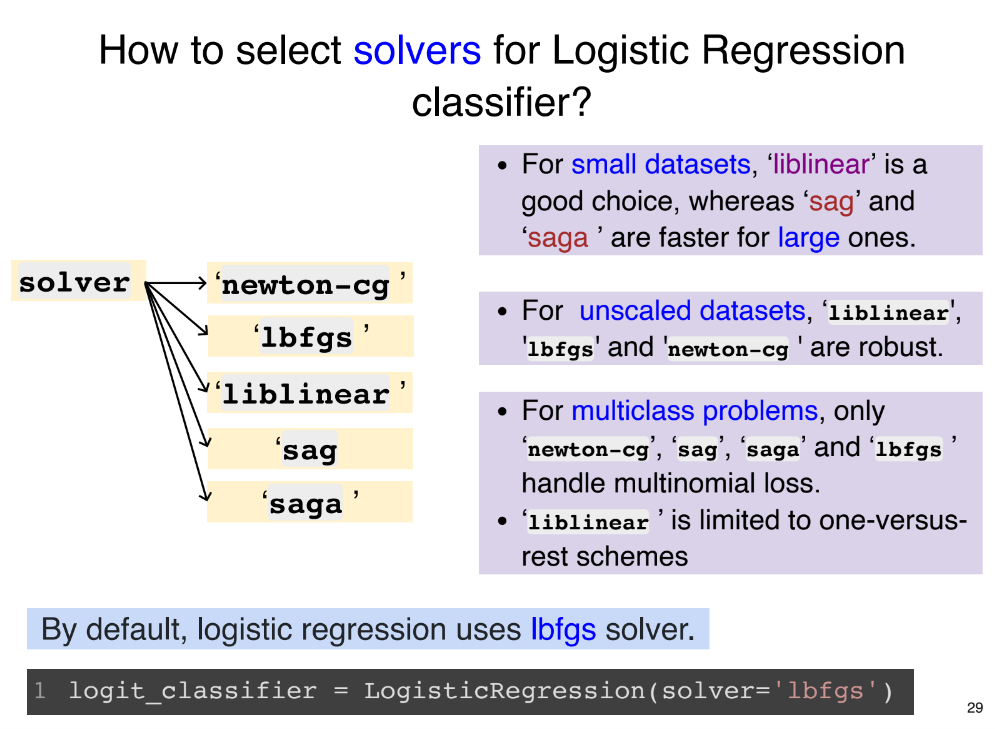

### Penalty (Regularization)
By default, uses **‘l2’** penalty ,but can be changed to one of **‘l1’, ‘l2’, ‘elasticnet’ or ‘none’**

- L2 penalty is supported by all solvers
- L1 penalty is supported only by a few solvers.

Following table shows support for penalties by different solvers

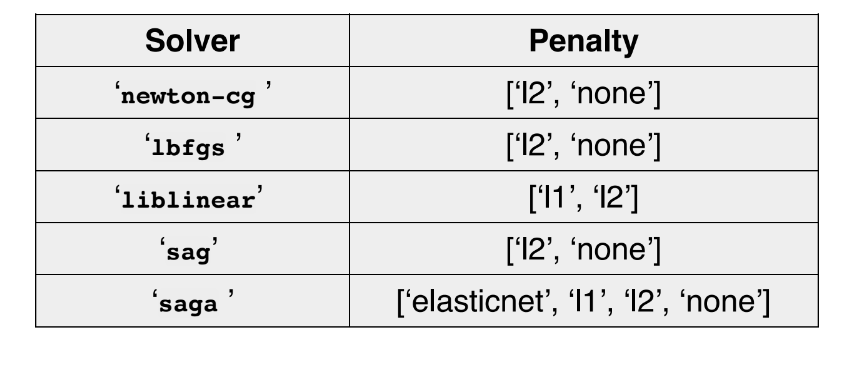

### How to control amount of regularization in logistic regression?

- sklearn implementation uses parameter C, which is inverse of regularization rate to control regularization.
-Recall : 
> ### arg min(w,C) regularization penalty + C*cross entropy loss

- C is specified in the constructor and must be positive : 
	- Smaller value leads to stronger regularization.
	- Larger value leads to weaker regularization.
    
**C is somewhat opposite to α(eta0) which we had previously used in SGD/Ridge Classifiers**    

1. Use parameter class_weight to handle class-imbalance in the dataset, where mistakes in a class can be penalized. Higher values of class_weight will put more emphasis on the corresponding class.

JUST FOR EXPLANATION PURPOSE : 
>For how class_weight works: It penalizes mistakes in samples of class[i] with class_weight[i] instead of 1. So higher class-weight means you want to put more emphasis on a class. From what you say it seems class 0 is 19 times more frequent than class 1. So you should increase the class_weight of class 1 relative to class 0, say {0:.1, 1:.9}. If the class_weight doesn't sum to 1, it will basically change the regularization parameter.


**LogisticRegressionCV** implements logistic regression with **in-built cross validation** support to find the best values of parameters *C and l1_ratio* according to the specified scoring attribute.

**These classifiers can also be implemented with a generic SGDClassifier API by setting the loss parameter appropriately.**

LogisticRegressionCV can also be used with binary/ multinomial classification (set multi_class parameter to multinomial) and one-vs-rest (OVR)

## SGDClassifier API

- SGD is a simple yet very efficient approach to fitting linear classifiers under convex loss functions SGDClassifier

- This API uses SGD as an optimization technique and can be applied to build a variety of linear classifiers by adjusting the
loss parameter.

- Easily scales up to large scale problems with more than 10<sup>5</sup> training examples and 10<sup>5</sup> features. It also works with sparse machine learning problems

- It supports multi-class classification by combining multiple binary classifiers in a “one versus all” (OVA) scheme. 

- Text classification and natural language processing

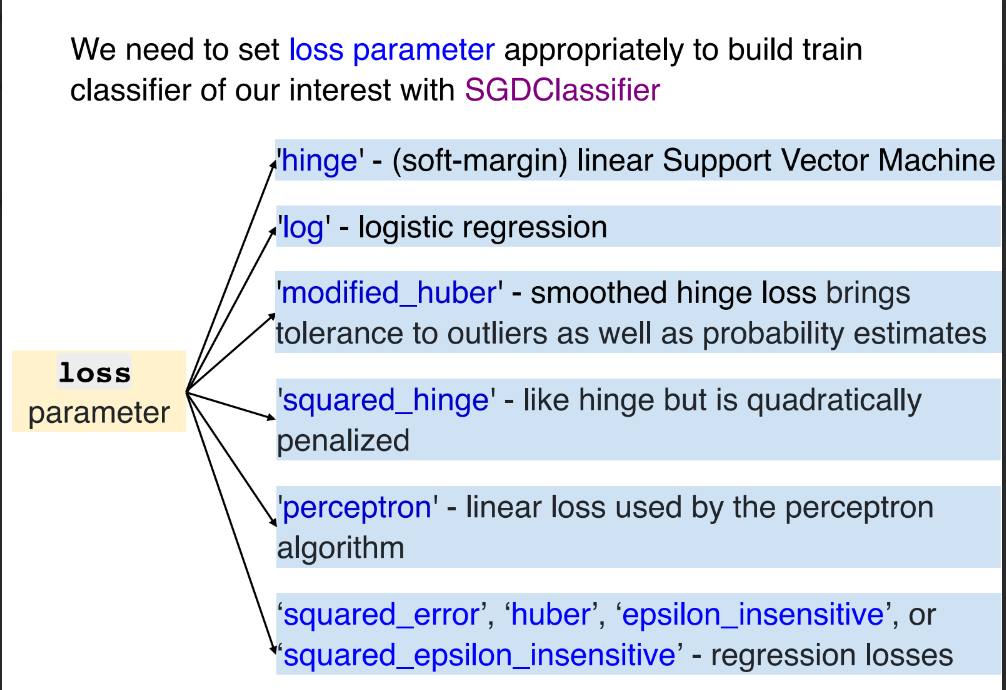

By default `SGDClassifier uses **hinge loss**` and hence trains linear support vector machine classifier.

* For most part, SGDClassifier works very similar to SGDRegressor, including the use of parameters and their default values. <br>
<br>
* Used with binary/multinomial classification, and one-vs-rest (OVR). It supports multinomial classification by combining multiple binary classifiers using one-vs-all scheme.
<br>
<br>
* Advantages include efficiency and ease of implementation, but disadvantageous because it requires a lot of hyperparameters, is highly sensitive to feature scaling. It also requires shuffling of data before fitting the model in each iteration.
<br>
<br>

>   1. SGDClassifier(loss=’log’) is equivalent to LogisticRegression(solver=’sgd’) <br>2. SGDClassifier(loss=’perceptron’) is equivalent to Perceptron()<br>3. SGDClassifier(loss=’hinge’) is equivalent to LinearSVC()<br>4. SGDClassifier(loss=’squared_error’) is equivalent to a least-square classifier.


In [ ]:
# How to implement

from sklearn.linear_model import SGDClassifier
SGD_classifier = SGDClassifier(loss='log')

#Here we have used `log` loss that defines a logistic regression classifier.

SGD_classifier.fit(X_train, y_train)

1. SGDClassifier has 3 types of penalty values supported : l1,l2,elasticnet (Convex combination of L1 and L2 **[(1 - l1_ratio) * L2 + l1_ratio * L1]** ). Default is l2
2. alpha - Constant that multiplies the regularization term. Has float values and `default = 0.0001`
3. The maximum number of passes over the training data (aka epochs) is an integer that can be set by the max_iter parameter.Default is `max_iter = 1000`.
4. Learning Rate - ‘constant’,‘optimal’, ‘invscaling’, ‘adaptive’.
5. SGDClassifier also supports averaged SGD (ASGD)
6. warm_start - True or False
7. Stopping criteria - 
    - tol
    - n_iter_no_change
    - max_iter
    - early_stopping
    - validation_fraction


    

### **All classification estimators have ability to deal with class imbalance through class_weight parameter in the constructor.**

# Multi-learning classification


### Basics of multiclass,multilabel and multioutput classification

- `Multiclass classification` has exactly one output label (Single Target Column) and the total number of classes > 2.

- For more than one output (More than single Target Column), there are two types of classification models :
    > **Multilabel (Total #Labels = 2)<br><br>
   > Multiclass multioutput (Total #Labels >2)**

We will refer both as multi-label classification (Where# of output labels >1 )

>All Multiclass,multilabel,multioutput problems are referres to as multi-learning problems

 

- Sklearn provides a buncn of **meta-estimators**, which extend the functionality of **base-estimators** to support multi-learning problems.

- The meta-estimators **transform the multi-learning problem into a set of simpler problems and fit one estimator per problem.**

> PROBLEM TYPES : 
    
1. Multiclass classification:
(sklearn.multiclass)
    - OneVsRestClassifier
    - OneVsOneClassifier
    - OutputCodeClassifier


2. Multilabel classification:
(sklearn.muttioutput)
    - MultiOutputClassifier
    - ClassifierChain


Many sklearn estimators have built-in support for multi- learning problems.

Meta-estimators are not needed for such estimators,however meta-estimators can be used in case we want to use these base estimators with strategies beyond the built-in ones.

> Few Sklearn API's  directly support multi-learning problems, either inherently or with techniques like OVR, OVO, Multilabel.

Inherently multiclass: 
   - LogisticRegression (multi_class = 'multinomial')
   - LogisticRegressionCV (multi_class = 'multinomial')
   - RidgeClassifier
   - RidgeClassifierCV
    
Multiclass as OVR(One vs Rest):
   - LogisticRegression (multi_class = 'ovr')
   - LogisticRegressionCV (multi_class = 'ovr')
   - SGDClassifier
   - Perceptron
    
Multilabel :
   - RidgeClassifier
   - RidgeClassifierCV


### Multiclass Classification

- Classification task with more than 2 classes
- Each Example is labeled with exactly one class

### How to represent class labels in multi-class setup?

- Each example is marked with a single label out of k labels. The shape of label vector is (n, 1).

- Use LabelBinarizer transformation to convert the class label to multi-class format.


In [8]:
from sklearn.preprocessing import LabelBinarizer
import numpy as np
y = np.array(["app","ora","app","Pinapp"])
y_new = LabelBinarizer().fit_transform(y)
y_new

array([[0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0]])

- Use `type_of_target` to check if the label input is binary, multi-class, continuous, multilabel-indicator or multiclass-multioutput.
<br><br>
- If the labels are represented in a matrix form, 
  - If the number of classes are two, it’s **multilabel-indicator (Ex. [[-1,1],[1,-1]])**
  - If there are more than two classes, it’s **multiclass-multioutput. (Ex. [[0,1,2],[0,1,2]])**<br><br>
  
- If the labels are represented in a vector form,
  - if the number of classes are two, it’s **binary (Ex. [0,1])**
  - If there are more than two classes, it’s **multi-class. (Ex. [0,1,2])<br><br>**
- If the values belong to a **continuous range (like a decimal), it’s continuous. (Ex. [1, 2.1, 3.4])**
<br><br>
- **Unknown** if array-like but none of the above, such as 3D Array or Sequence of sequences or an array of non-sequence objects.

In [18]:
from sklearn.utils.multiclass import type_of_target
print("[[-1,1],[1,-1]]",type_of_target([[-1,1],[1,-1]]))
print("[[1, 2.1, 3.4],[1.8,2.4,55.3]]",type_of_target([[1, 2.1, 3.4],[1.8,2.4,55.3]]))
print("[[0,1,2],[0,1,2]]",type_of_target([[0,1,2],[0,1,2]]))

[[-1,1],[1,-1]] multilabel-indicator
[[1, 2.1, 3.4],[1.8,2.4,55.3]] continuous-multioutput
[[0,1,2],[0,1,2]] multiclass-multioutput


### All classifiers in scikit-learn perform multiclass classification out-of-the-box.

Use sklearn.multiclass module only when you want to experiment with different multiclass strategies. 


- Using different multi-class strategy than the one implemented by default may `affect performance of classifier in terms of either generalization error or computational resource requirement.`

### What are different multi-class classification strategies implemented in sklearn?

- One-vs-all or one-vs-rest (OVR)
- One-vs-One (OVA)

> OVR is implemented by OneVsRestClassifier API.

> OVA is implemented by OneVsOneClassifier API.

### OVR - OneVsRestClassifier

Fits one classifier per class - c, c vs not c.
This approach is computationally efficient and requires "k" only classifiers.
The resulting model is interpretable.

>**from sklearn.multiclass import OneVsRestClassifier<br>OneVsRestClassifier(LinearSVC(random_state=0)).fit(X, y)**

- We need to supply estimator as an argument in the constructor(In this case, we supplied LinearSVC()).
- Support methods like other classifiers - fit, predict,predict_proba, partial_fit.

#### OneVsRest classifier also supports multilabel classification. We need to supply labels as indicator matrix of shape (n, k). (Can be achieved through LabelBinarizer

### OVA - OneVsOneClassifier

- Fits one classifier per pair of classes. Total classifiers = <sup>K</sup>**C**<sub>2</sub> where k is no of classes.
- Predicts class that receives maximum votes.

The tie among classes is broken by selecting the class with the highest aggregate classification confidence.


>**from sklearn.multiclass import OneVsOneClassifier<br>OneVsOneClassifier(LinearSVC(random_state=0)).fit(X, y)**
- We need to supply estimator as an argument in the constructor.
- Support methods like other classifiers - fit, predict,predict_proba, partial_fit.

#### OneVsOne classifier processes subset of data at a time and is useful in cases where the classifier does not scale with the data.

   

### What is the difference between OVR and OVA?

OneVsRestClassifier 
+ Fits one classifier per class. 
+ For each classifier, the class is fitted against all the other classes. 

OneVsOneClassifier
- Fits one classifier per pair of classes.
- At prediction time, the class which received the most votes is selected.


##  Multilabel/Multioutput Strategies 

### sklearn implements the following multilabel/multioutput strategies 
- `MultiOutputClassifier` fits one classifier per target.
> Basically what it does is it fits the classifier model/API to all the targets individually, for example, it picks all the features and fits them individually onto singular target labels and repeat this process until all the features are fitted wrt all labels.

- `ClassifierChain` fits binary classifiers in a chain, so that output of one classifier can be combined with other such classifiers in the chain, to make a multilabel model.
> It takes all the input features and fit the classifier model/API on the first target label, then on the second iteration it takes that predicted value from the 1st label and takes all the features plus that predicted values from the first label and takes all three as input features for the subsequent label.This cycle continues till all the labels are fitted in similar fashion.

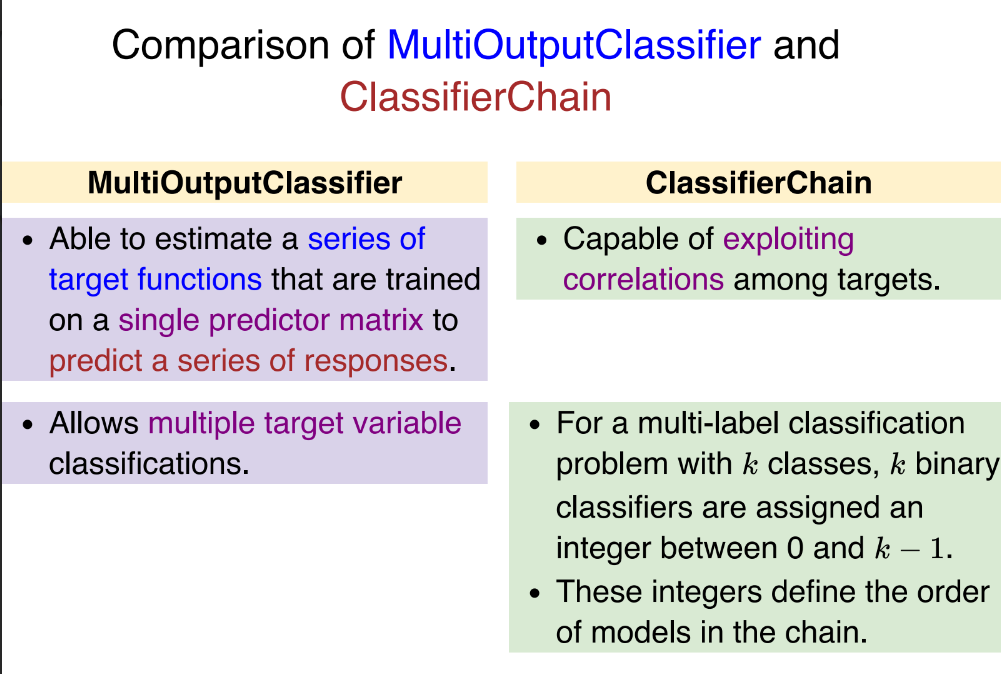

# Summary 
1. Different types of multi-learning setups: `multi-class`,`multi-label`, `multi-output`.
2. `type_of_target` to determine the nature of supplied labels.

3. Meta-estimators:
   - **multi-class: One-vs-rest, one-vs-one**
   - **multi-label: Classifier chain and multi-output classifier**

## Evaluating Classifiers


sklearn.model_selection module provides the following three stratified APIs to create folds such that the overall class distribution is replicated in individual folds.

- StratifiedKFold
- RepeatedStratifiedKFold
- StratifiedShuffleSplit

Note: Folds obtained via StratifiedShuffleSplit may not be completely different.

In [ ]:
# The following code does roughly the same thing as Scikit-Learn’s cross_val_score() function, and prints the same result:

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
 clone_clf = clone(sgd_clf)
 X_train_folds = X_train[train_index]
 y_train_folds = y_train_5[train_index]
 X_test_fold = X_train[test_index]
 y_test_fold = y_train_5[test_index]

 clone_clf.fit(X_train_folds, y_train_folds)
 y_pred = clone_clf.predict(X_test_fold)
 n_correct = sum(y_pred == y_test_fold)
 print(n_correct / len(y_pred)) # prints 0.9502, 0.96565 and 0.96495

> The StratifiedKFold class performs stratified sampling to produce folds that contain a representative ratio of each class

## LogisticRegressionCV

**Support in-build cross validation for optimizing hyperparameters**

The following are key parameters for HPT and cross validation :
1. `cv` specifies cross validation iterator

2. `scoring` specifies scoring function to use for HPT.

3. `cs` specifies regularization strengths to experiment with.

refit = True : Scores averaged across folds, values corresponding to the best score are selected and final refit with these parameters

refit = False : the coefs, intercepts and C that correspond to the best scores across folds are averaged.




In [ ]:
estimator = LogisticRegressionCV(cv=5, scoring='f1', random_state=1729)
logit_cv = make_pipeline(MinMaxScaler(), estimator)
logit_cv.fit(X_train, y_train_0)

lr_cv_y_hat_0 = logit_cv.predict(X_test)

precision_lr_cv = precision_score(y_test_0, lr_cv_y_hat_0)
recall_lr_cv = recall_score(y_test_0, lr_cv_y_hat_0)

print(f'LogRegCV: precision={precision_lr_cv}, recall={recall_lr_cv}')

#print LogRegCV: precision=0.9546370967741935, recall=0.9663265306122449

## Classification metrics

`sklearn.metrics` implements a bunch of classification scoring metrics based on true labels and predicted labels as inputs.

- accuracy_score
- balanced_accuracy_score
- top_k_accuracy_score
- roc_auc_score
- precision_score
- recall_score 
- f1_score

> score(actual_labels, predicted_labels)

#### Accuracy

> from sklearn.model_selection import cross_val_score <br> >>> cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")<br> array([ 0.9502 , 0.96565, 0.96495])


- Above 95% accuracy (ratio of correct predictions) on all cross-validation folds? 
- This looks amazing, doesn’t it? Well, before you get too excited, let’s look at a very dumb classifier that just classifies every single image in the “not-5” class: 
> from sklearn.base import BaseEstimator<br>class Never5Classifier(BaseEstimator):<br> >> def fit(self, X, y=None):<br>>>> pass<br> >>def predict(self, X):<br> >>>return np.zeros((len(X), 1), dtype=bool)<br>

Can you guess this model’s accuracy? Let’s find out:
> never_5_clf = Never5Classifier()<br>cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")<br>>>>array([ 0.909 , 0.90715, 0.9128 ])

- That’s right, it has over 90% accuracy! This is simply because only about 10% of the images are 5s, so if you always guess that an image is not a 5, you will be right about 90% of the time.

##### Accuracy is generally not the preferred performance measure for classifiers, especially when you are dealing with skewed datasets (i.e., when some classes are much more frequent than others).

### Confusion matrix 

1. confusion_matrix evaluates classification accuracy by computing the confusion matrix with each row corresponding to the true class.

>**from sklearn.metrics import confusion_matrix<br>confusion_matrix(y_true, y_predicted)**

In [2]:
#Prints ->   array([[53272, 1307],
#                  [ 1077, 4344]])

Each row in a confusion matrix represents an actual class, while each column represents a predicted class. The first row of this matrix considers non-5 images (the negative class): 53,272 of them were `correctly classified as non-5s (they are called true negatives), while the remaining 1,307 were wrongly classified as 5s (false positives)`.

The second row considers the images of 5s (the positive class): `1,077 were wrongly classified as non-5s (false negatives), while the remaining 4,344 were correctly classified as 5s (true positives)`

**A perfect classifier would have only true positives and true negatives, so its confusion matrix would have nonzero values only on its main diagonal (top left to bottom right)**

### Precision
precision = TP/(TP + FP)
- An interesting one to look at is the accuracy of the positive predictions; this is called the precision of the classifier

### Recall
recall = TP/(TP+FN)
- precision is typically used along with another metric named recall, also called sensitivity or true positive rate (TPR): this is the ratio of positive instances that are correctly detected by the classifier

> from sklearn.metrics import precision_score, recall_score<br><br>>>> precision_score(y_train_5, y_train_pred) # == 4344 / (4344 + 1307)<br>0.76871350203503808<br><br>>>> recall_score(y_train_5, y_train_pred) # == 4344 / (4344 + 1077)<br>0.80132816823464303


### F1-Score
- It is often convenient to combine precision and recall into a single metric called the F1-score, in particular if you need a simple way to compare two classifiers. The F1-score is the harmonic mean of precision and recall (Equation 3-3). Whereas the regular mean
treats all values equally, the harmonic mean gives much more weight to low values
- `F1=2/((1/precision) + (1/recall))`

> from sklearn.metrics import f1_score<br><br>>>> f1_score(y_train_5, y_train_pred)<br>0.78468208092485547

### Confusion matrix can be displayed with ConfusionMatrixDisplay API in sklearn.metrics.

- Confusion matrix 
  - >ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

- From estimators
  - >ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

- From predictions
  - >ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

### The `classification_report` function builds a text report showing the main classification metrics.

> from sklearn.metrics import classification_report<br>print(classification_report(y_true, y_predicted))


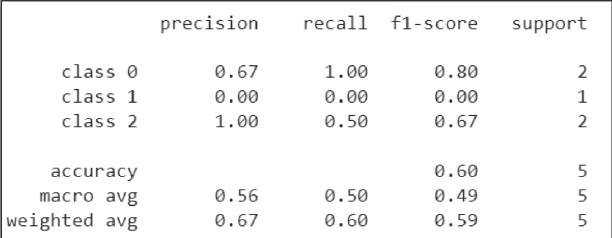

## Classifier Performance across probability thresholds

### Precision-Recall Tradeoff 

- To understand this tradeoff, let’s look at how the SGDClassifier makes its classification decisions. For each instance, it computes a score based on a **`decision function`**, and if that score is greater than a **threshold**, it assigns the instance to the positive class, or else it assigns it to the negative class.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

C:\Users\rahul gupta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Text(0.5, 1.0, 'Created Data')

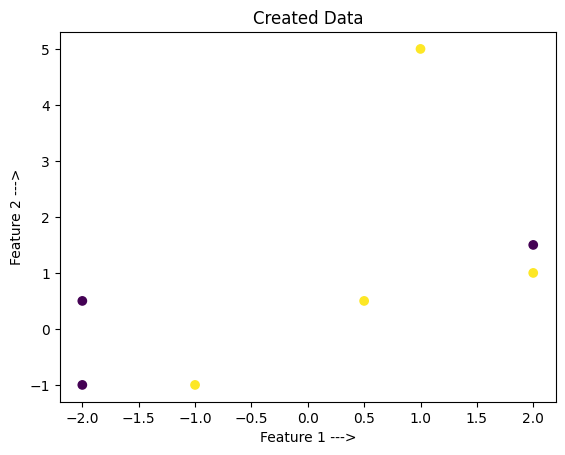

In [5]:
import numpy as np
# Input Feature X.
x = np.array([[2, 1.5], [-2, -1], [-1, -1], [2, 1],
              [1, 5], [0.5, 0.5], [-2, 0.5]])
 
# Input Feature Y.
y = np.array([0, 0, 1, 1, 1, 1, 0])
 
# Training set Feature x_train.
x_train = np.array([[2, 1.5], [-2, -1], [-1, -1], [2, 1]])
 
# Training set Target Variable y_train.
y_train = np.array([0, 0, 1, 1])
 
# Test set Feature x_test.
x_test = np.array([[1, 5], [0.5, 0.5], [-2, 0.5]])
 
# Test set Target Variable y_test
y_test = np.array([1, 1, 0])
 
# Plot the obtained data
plt.scatter(x[:, 0], x[:, 1], c = y)
plt.xlabel('Feature 1 --->')
plt.ylabel('Feature 2 --->')
plt.title('Created Data')

In [6]:
from sklearn.svm import SVC
import pandas as pd
clf = SVC()
 
# Train the model on the training set.
clf.fit(x_train, y_train)
 
# Predict on Test set
predict = clf.predict(x_test)
print('Predicted Values from Classifier:', predict)
print('Actual Output is:', y_test)
print('Accuracy of the model is:', clf.score(x_test, y_test))



Decision_Function= clf.decision_function(x_test)
print()
print('Output of Decision Function is:', Decision_Function)
print('Prediction for x_test from classifier is:', predict)


Predicted Values from Classifier: [0 1 0]
Actual Output is: [1 1 0]
Accuracy of the model is: 0.6666666666666666

Output of Decision Function is: [-0.04274893  0.29143233 -0.13001369]
Prediction for x_test from classifier is: [0 1 0]


- From the above output, we can conclude that the decision function output represents whether a predicted sample for x_test by the classifier lies to the right side or left side of hyperplane and also how far from it. It also tells us how confidently each value predicted for x_test by the classifier is  Positive ( large-magnitude Positive value ) or Negative ( large-magnitude Negative value) 

- So how can you decide which threshold to use? For this you will first need to get the scores of all instances in the training set using the cross_val_predict() function again, but this time specifying that you want it to return decision scores instead of predictions

In [7]:
from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(clf, x_train, y_train, cv=2, method="decision_function")
y_scores

array([ 0.93955086,  0.76786401, -0.74445717, -0.90305381])

In [9]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

array([-0.90305381, -0.74445717,  0.76786401,  0.93955086])

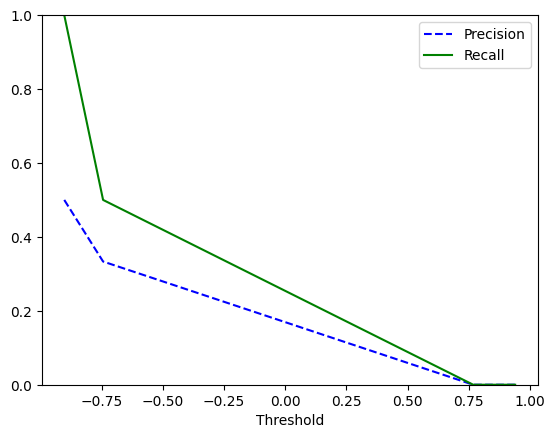

In [14]:
# Finally, you can plot precision and recall as functions of the threshold value using Matplotlib 

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
 plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
 plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
 plt.xlabel("Threshold")
 plt.legend(loc="best")
 plt.ylim([0, 1])
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

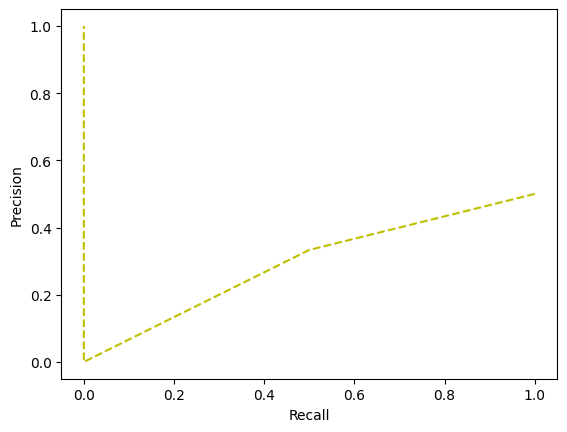

In [16]:
# Now you can simply select the threshold value that gives you the best precision/recall
# tradeoff for your task.

# Another way to select a good precision/recall tradeoff is to plot precision directly against recall

plt.plot(recalls,precisions,"y--")
plt.xlabel('Recall')
plt.ylabel("Precision")
plt.show()

- So let’s suppose you decide to aim for 20% precision. You look up the first plot (zooming in a bit) and find that you need to use a threshold of about -0.15



In [51]:
y_train_pred_90 = (y_scores > -0.15)
y_train_pred_90

array([ True,  True, False, False])

### ROC Curve 
The receiver operating characteristic (ROC) curve is another common tool used with
binary classifiers. It is very similar to the precision/recall curve, but instead of plot‐
ting precision versus recall, the ROC curve plots the true positive rate (another name
for recall) against the false positive rate

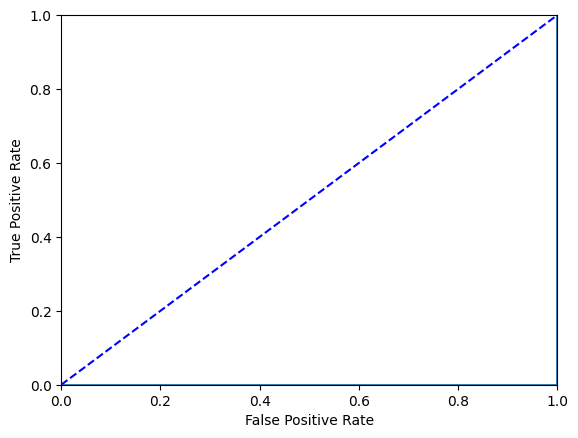

In [53]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
 plt.plot(fpr, tpr,linewidth=2, label=label)
 plt.plot([0, 1], [0, 1], 'b--')
 plt.axis([0, 1, 0, 1])
 plt.xlabel('False Positive Rate')
 plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()


## How to extend binary metric to multiclass or multilabel problems?
- Treat data as a collection of binary problems, one for each class.
- Then, average binary metric calculations across the set of classes.

- Can be done using **`average`** parameter.
<br><br>
- `macro` : calculates the mean of the binary metrics

- `weighted` : computes the average of binary metrics in which each class’s score is weighted by its presence in the true data sample.

- `micro`: gives each sample-class pair an equal contribution to the overall metric

- `samples` : calculates the metric over the true and predicted classes for each sample in the evaluation data, and returns their average

- `None`  : returns an array with the score for each class











# Classification W5

### **Introduction** 

* Over the past four weeks we explored various data preprocessing techniques and solved some regression problems using linear and logistic regression models. The other side of the supervised learning paradigm is **classification problems**.

* To solve such problems we are going to consider **image classification** as a running example and solving it using **Perceptron()** method.


### **Imports**


* For classification problems, we need to import classes and utilities from sklearn.linear_model.

* This module has implementations for different classification models like `Perceptron, LogisticRegression, svm` and `knn`.

* We also need to import a bunch of model selection utilities from `sklearn.model_selection` module and metrics from `sklearn.metrics` module.

* The data preprocessing utilities are imported from `sklearn.preprocessing` modules.


In [1]:
# Common imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns ;sns.set()
import os
import io
import warnings

# sklearn specific imports
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import Perceptron

from sklearn.metrics import hinge_loss
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, precision_recall_curve
from sklearn.metrics import precision_score, recall_score, classification_report

from sklearn.model_selection import cross_validate, cross_val_predict, GridSearchCV

from pprint import pprint

## **Handwritten Digit Classification**

* We are going to use **Perceptron Classifier** to classify (recognize) given digit images. 

* Since a single perceptron could **only** be used for **binary classification**, we consider only two classes in the first half. Eventually we will extend it to a multi-class setting.

* Suppose we want to recognize whether the given image is of digit zero or not  (digit other than zero). Then the problem could be cast as a binary classification problem.

* The first step is to **create a dataset** that contains a **collection of digit images** (also called examples, samples) written by humans. Then each image should be **labelled** properly.


### **Data Loading**

In [2]:
# returns Data and Label as a pandas dataframe
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

The data matrix $X$ and the respective label vector $ y$ need to be converted to the numpy array by calling a `to_numpy` method.

In [3]:
X = X.to_numpy()
y = y.to_numpy()

Let's get some information like number of features, number of classes about the dataset.

Observe that the labels are of string data type not integers.

In [4]:
target_names = np.unique(y)
print('Number of samples : {0}, type : {1}'.format(X.shape[0], X.dtype))
print('Number of features : {0}'.format(X.shape[1]))

Number of samples : 70000, type : float64
Number of features : 784


In [5]:
print('Minimum : ', np.min(X))
print('Maximum : ', np.max(X))

Minimum :  0.0
Maximum :  255.0


In [6]:
print('Number of classes : {0},type :{1}'.format(len(target_names), y.dtype))
print('Labels : {0}'.format(target_names))

Number of classes : 10,type :object
Labels : ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


* The **MNIST** dataset is clean and the range of values that each feature can take is also known. Therefore, the samples in the dataset may not require many data preprocessing techniques.

* However, it is often better to scale the range of features between 0 to 1.

* So, we can either use `MinMaxScaler` or `MaxAbsScaler`. They don't make any difference as the image pixels can takes only positive value from 0 to 255.

In [7]:
X = MinMaxScaler().fit_transform(X)

print('Minimum : ', np.min(X))
print('Maximum : ', np.max(X))

Minimum :  0.0
Maximum :  1.0


### **Data Visualization**

Let us pick a few images (the images are already shuffled in the dataset) and display them with their respective labels. 

As said above, the images are stacked as a row vector of size $ 1 \times 784$ and therefore must be reshaped to the matrix of size $ 28 \times 28$ to display them properly.

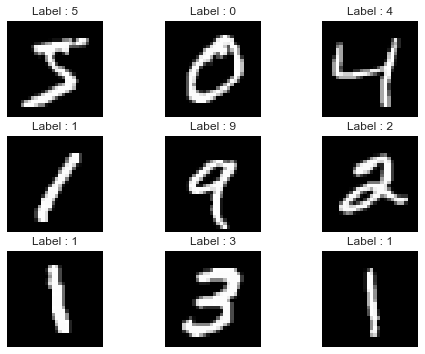

In [8]:
# Choose a square number
num_images = 9  
factor = int(np.sqrt(num_images))

fig,ax = plt.subplots(nrows=factor, ncols=factor,figsize=(8,6))
# take "num_images" starting from the index "idx_offset"
idx_offset = 0 

for i in range(factor):
  index = idx_offset + i*(factor)
  for j in range(factor):
    ax[i,j].imshow(X[index+j].reshape(28,28), cmap='gray')
    ax[i,j].set_title('Label : {0}'.format(str(y[index+j])))
    ax[i,j].set_axis_off()

If we closely observe, we can see that there are moderate variations in the appearance of digits (ex: digit 1).

These matrices also close to sparse (i.e, there are lots of zero / black pixels in the matrix than non-zero pixels)

### **Data Splitting**

* Now, we know the details such as number of samples, size of each sample, number of features (784), number of classes (targets) about the dataset.

* So let's split the total number of samples into train and test set in the following ratio : 60000/10000 (i.e 60000 samples in the training set and 10000 samples in the testing set).


* Since the samples in the data set are already randomly shuffled, we need **not to** shuffle it again. Therefore using `train_test_split()` may be skipped.

## **Binary Classification : 0-Detector**

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### **Handling Imbalanced Data**

Before proceeding further, we need to check whether the dataset is balanced or imbalanced. 

We can do it by plotting the distribution of samples in each classes.

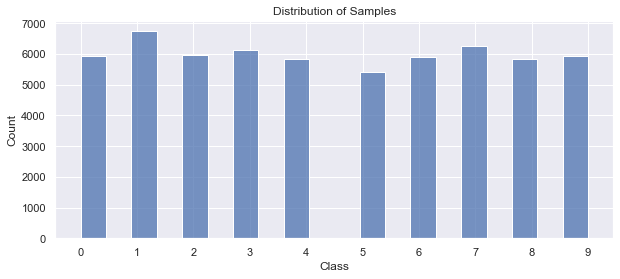

In [10]:
plt.figure(figsize=(10, 4))

sns.histplot(data=np.int8(y_train), binwidth=0.45, bins=11)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
           labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

plt.xlabel('Class')
plt.title('Distribution of Samples')
plt.show()

### **Modifying Labels**

* Let us start with a simple classification problem, i.e **binary classification**.

* Since the original label vector contains **10** classes, we need to modify the number of classes to 2.

* Therefore, the label **0** will be changed **1** and all the other labels (1-9) will be changed to **-1**.

* We will name the label vectors as `y_train_0` and `y_test_0`.

In [11]:
# initialize new variable names with all -1
y_train_0 = -1*np.ones(len(y_train))
y_test_0 = -1*np.ones(len(y_test))

# find indices of digit 0 image
indx_0 = np.where(y_train=='0') 

# remember original labels are of type str not int, so use those indices to modify y_train_0 & y_test_0

y_train_0[indx_0] = 1
indx_0 = np.where(y_test =='0')
y_test_0[indx_0] = 1

#### Sanity check :

Let's display the elements of y_train and y_train_0 to verify whether the labels are properly modified.

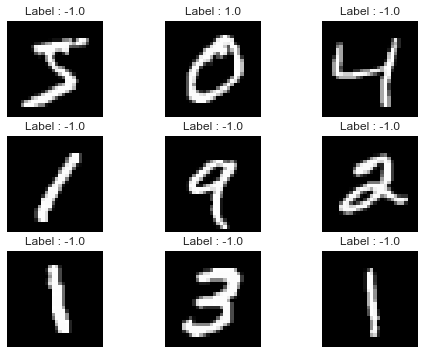

In [12]:
# Choose a square number
num_images = 9  
factor = int(np.sqrt(num_images))

fig,ax = plt.subplots(nrows=factor, ncols=factor,figsize=(8,6))
# take "num_images" starting from the index "idx_offset"
idx_offset = 0 

for i in range(factor):
    index = idx_offset + i*(factor)
    for j in range(factor):
        ax[i,j].imshow(X[index+j].reshape(28,28), cmap='gray')
        ax[i,j].set_title('Label : {0}'.format(str(y_train_0[index+j])))
        ax[i,j].set_axis_off()

## **Model**

### **Baseline Models**

Let us quickly construct a baseline model with the following rule : (you are free to choose different rules)

1. Count number of samples per class.

2. The model **always outputs** the class which has highest number of samples.

3. Then calculate the accuracy of the baseline model.

In [13]:
num_pos = len(np.where(y_train_0 == 1)[0])
num_neg = len(np.where(y_train_0 == -1)[0])

print(num_pos)
print(num_neg)

5923
54077


In [14]:
base_clf = DummyClassifier(strategy='most_frequent')
base_clf.fit(X_train ,y_train_0)

print('Training accuracy : {0:.4f}'.format(base_clf.score(X_train, y_train_0)))
print('Testing accuracy : {0:.4f}'.format(base_clf.score(X_test,y_test_0)))

Training accuracy : 0.9013
Testing accuracy : 0.9020


Now the reason is obvious. The model would have predicted 54077 samples correctly just by outputing -1 for all the input samples. 

Therefore, the accuracy will be simply :  $ \frac{54077}{60000} = 0.90128 $

This is the reason why **"accuracy"** alone is **not always a good** measure!.

### **Perceptron Model**


Quick recap of various components in the general settings:

##### 1. **Training data** 

* consists of features & labels or $(\mathbf X,y)$ 

* Here, $y$ is a **discrete** number from a finite set.

* **Features** in this case are **pixel** values of an image.


##### 2. **Model** : 

\begin{align} 
h_w:y&=&\text g(\mathbf w^T 
\mathbf x) \\ 
&=&\text g(w_0+w_1x_1+\ldots + w_mx_m)
\end{align} 

where,
* $\mathbf w$ is weight vector in $\mathbb{R}^{(m+1)}$ i.e. it has components : $\{w_0,w_1,\ldots,w_m\}$

* g(z) is a non-linear activation function given by a sign function:

$$\text g(z)=\begin{cases} +1 ,\text {if} \ z \ge 0 \\
-1, \text {otherwise}(i.e. z \lt 0)\end{cases}$$

##### 3. **Loss function** : 

Let $ {\hat y}^{(i)} \in \{-1,+1\}$ be the prediction from perceptron and ${\hat y}^{(i)}$ be the actual label for $i-\text{th}$ example. 
$ \\ $

The error is :

$$\text e^{(i)}=\begin{cases} 0 , \ \ \text { if} \ \ {\hat y}^{(i)} = y^{(i)} \\
-\mathbf {w^Tx^{(i)}}y^{(i)}, \text { otherwise} (i.e. {\hat y}^{(i)} \ne y^{(i)})\end{cases}$$

This can be compactly written as:

\begin{equation} 
e^{(i)}=\max(-\mathbf{w^Tx^{(i)}}y^{(i)},0)=\max(-h_{\text w }(\mathbf x^{(i)})y^{(i)},0)
\end{equation} 

##### 4. **Optimization** :

Perceptron learning algorithm :

1. Initialize $\mathbf {\text w}^{(0)}=0$

2. For each training example $(x^{(i)},y^{(i)})$

* ${\hat y}^{(i)}=\text{sign}(\mathbf {w^Tx}^{(i)})[\text {Calculates the output value}]$

* $\mathbf w^{(t+1)} := \mathbf w^{(t)}+ \alpha (y^{(i)}-{\hat y}^{(i)})\mathbf x^{(i)}[\text{Updates the weights}] $

**IMP** : Linearly separable examples lead to convergence of the algorithm with zero training loss, else it oscillates.

#### **Parameters of Perceptron Class**

* Let's quickly take a look into the important parameters of the Perceptron()

class sklearn.linear_model.Perceptron `(*,penalty=None, alpha = 0.0001, l1_ratio=0.15, fit_intercept = True, max_iter=1000,tol=0.001, shuffle=True, verbose=0, eta0=1.0, n_jobs=None, random_state=0, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5,class_weight=None, warm_start=False).`

* We need not to pay attention to all the arguments and their default values.

* Internally, the API uses the perceptron loss (i.e. it calls **Hinge(0,0)**, where 0.0 is a threshold) and uses SGD to update the weights.

* The other way of deploying perceptron is to use the general `linear_model.SGDClassifier` with `loss='perceptron'`

* The above loss is termed as hard Hinge-loss (as scores pass through the sign function) and hence we can't use SGD.

* Whereas, sklearn implements hinge-loss with the following definition: $\max  (0,-wx^iy^i$) and by default calls SGD to minimize the loss.


#### **Instantiation**

Create an instantiation of binary classifier (bin_clf).

In [18]:
bin_clf = Perceptron(max_iter=100,random_state=1729)

NameError: name 'Perceptron' is not defined

#### **Training and Prediction**

* Call the `fit` method to train the model.

* It would be nice to plot the iteration vs loss curve for the training. However, sklearn does not have a direct function to plot it.

* Nevertheless, we can workaround this using `partial_fit` method (explained later)

In [16]:
bin_clf.fit(X_train, y_train_0)

print('Dimension of Weights : {0}'.format(bin_clf.coef_.shape))
print('Bias : {0}'.format(bin_clf.intercept_))
print('Loss function : {0}'.format(bin_clf.loss_function_))

Dimension of Weights : (1, 784)
Bias : [-108.]
Loss function : <sklearn.linear_model._sgd_fast.Hinge object at 0x0000016D2BEF3570>


Let us make predictions on the training set and then calculate the training accuracy.

In [17]:
y_hat_train_0 = bin_clf.predict(X_train)
print('Training Accuracy :', bin_clf.score(X_train,y_train_0))

Training Accuracy : 0.99095


Let us make the predictions on the test set and then calculate the testing accuracy.

In [17]:
print('Test accuracy :',bin_clf.score(X_test,y_test_0))

NameError: name 'bin_clf' is not defined

#### **Displaying Predictions**
* Take few images from the test-set at random and display it with the corresponding predictions.

* Plot a few images in a single figure window along with their respective **Predictions**. 

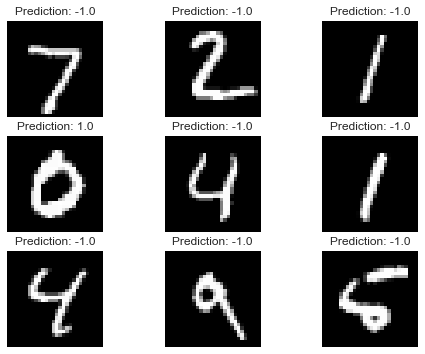

In [19]:
y_hat_test_0 = bin_clf.predict(X_test)

num_images = 9 
factor = int(np.sqrt(num_images)) 
fig,ax = plt.subplots(nrows=factor, ncols = factor, figsize=(8,6))
idx_offset  = 0 

for i in range(factor):
    index = idx_offset + i*(factor)
    for j in range(factor):
        ax[i,j].imshow(X_test[index+j].reshape(28,28),cmap='gray')
        ax[i,j].set_title('Prediction: {0}'.format(str(y_hat_test_0[index+j])))
        ax[i,j].set_axis_off()

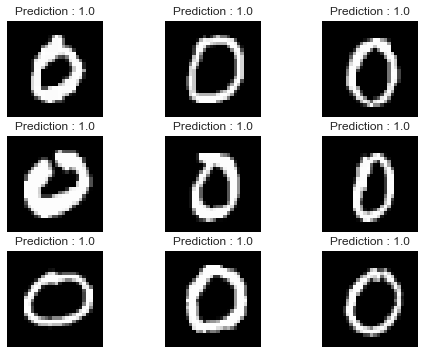

In [20]:
indx_0  = np.where(y_test_0==1)

zeroImgs = X_test[indx_0[0]]
zeroLabls = y_hat_test_0[indx_0[0]]

num_images = 9 
factor = int(np.sqrt(num_images))
fig, ax = plt.subplots(nrows=factor, ncols=factor, figsize=(8,6))
idx_offset = 0 

for i in range(factor):
    index = idx_offset + i*(factor)
    for j in range(factor):
        ax[i,j].imshow(zeroImgs[index+j].reshape(28,28),cmap='gray') 
        ax[i,j].set_title('Prediction : {0}'.format(str(zeroLabls[index+j])))
        ax[i,j].set_axis_off()

It seems that there are a significant number of images that are correctly classified.

In [21]:
num_misclassified = np.count_nonzero(zeroLabls == -1)
num_correctclassified = len(zeroLabls) - num_misclassified

accuracy = num_correctclassified / len(zeroLabls)
print(accuracy)

0.9193877551020408


* This above score is less than the accuracy score of the model but it seems preety descent.

* Will it be the same if we consider another digit, say, 5 for positive class and all other class as negative. Of course not.


#### **Better Evaluation metrics**
* We now know that using the accuracy **alone** to measure the performance of the model is not suitable (especially for imbalanced datasets).


##### **1. Confusion Matrix**


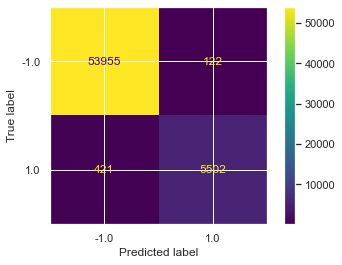

In [22]:
y_hat_train_0 = bin_clf.predict(X_train)

cm_display = ConfusionMatrixDisplay.from_predictions(
    y_train_0, y_hat_train_0, values_format='.5g', display_labels=bin_clf.classes_)
plt.show()

* Pay attention to the number of FPs and FNs. Suppose for some reasons, we want the classifer to avoid FPs to a good extent irrespective of FNs, how can we acheive it.

* To answer it, let's compute the other metrics which take FPs and FNs into account.

##### **2. Precision & Recall**

We can use the function `classification_report` to compute these parameters. 

However, for the time being let's compute these parameters using the data from the confusion matrix manually.

In [23]:
cf_matrix = cm_display.confusion_matrix 

tn = cf_matrix[0,0]
fn = cf_matrix[1,0]
fp = cf_matrix[0,1]
tp = cf_matrix[1,1]

In [24]:
precision = tp/(tp+fp)
print('Precision : ', precision)

recall = tp/(tp+fn)
print('Recall : ', recall)

accuracy = (tn+tp)/(tn+tp+fn+fp)
print('Accuracy : ', accuracy)


Precision :  0.9783072546230441
Recall :  0.9289211548201924
Accuracy :  0.99095


* Precision is close to 0.98. Despite it, we still want to increase the precision.

* In general, we would like to know whether the model under consideration with the set hyper-parameters is a good one for a given problem.

##### **Cross validation (CV)**

* Well to address this, we have to use cross-validation folds and measure the same metrics across these folds for different values of hyperparameters.

* However, perceptron doesn't have many hyperparameters other than the learning rate.

* For the moment, we set the learning rate to its default value. Later, we will use `GridSearchCV` to find the better value for the learning rate.

**Generalization**

In [25]:
bin_clf = Perceptron(max_iter=100, random_state=1729)

scores = cross_validate(bin_clf, X_train, y_train_0, cv=5, scoring=[
                        'precision', 'recall', 'f1'], return_estimator=True)
print(scores)

{'fit_time': array([0.80022049, 1.47012854, 1.06001902, 0.94003081, 1.28021407]), 'score_time': array([0.02770138, 0.02423024, 0.02049136, 0.02981305, 0.02924967]), 'estimator': [Perceptron(max_iter=100, random_state=1729), Perceptron(max_iter=100, random_state=1729), Perceptron(max_iter=100, random_state=1729), Perceptron(max_iter=100, random_state=1729), Perceptron(max_iter=100, random_state=1729)], 'test_precision': array([0.95890411, 0.98828125, 0.95319149, 0.95090439, 0.96200345]), 'test_recall': array([0.94594595, 0.85472973, 0.94514768, 0.93164557, 0.94008439]), 'test_f1': array([0.95238095, 0.91666667, 0.94915254, 0.94117647, 0.95091763])}


**NOTE :** 

The perceptron estimator passed as an argument to the function `cross_validate` is internally cloned `num_fold (cv=5)` times and fitted independently on each fold. (you can check this by setting `warm_start=True`)

Compute the average and standard deviation of scores for all three metrics on (k=5) folds to measure the generalization!.


In [26]:
print('Precision : avg : {0:.2f},  std : {1:.2f}'.format(
    scores['test_precision'].mean(), scores['test_precision'].std()))

print()
print('Recall : avg : {0:.2f},  std : {1:.2f}'.format(
    scores['test_recall'].mean(), scores['test_recall'].std()))

print()
print('F1 score : avg : {0:.2f},  std : {1:.3f}'.format(
    scores['test_f1'].mean(), scores['test_f1'].std()))

Precision : avg : 0.96,  std : 0.01

Recall : avg : 0.92,  std : 0.03

F1 score : avg : 0.94,  std : 0.013


* Let us pick the first estimator returned by the cross-validate function.

* So, we can hope that the model might also perform well on test data.

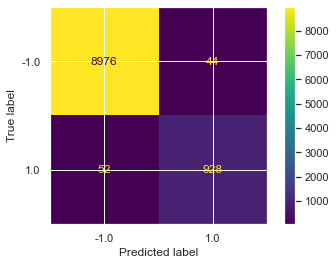

In [27]:
bin_clf = scores['estimator'][0]
y_hat_test_0 = bin_clf.predict(X_test)

cm_display = ConfusionMatrixDisplay.from_predictions(
    y_test_0, y_hat_test_0, values_format='.5g')

In [28]:
print('Precision : {0:.4f}'.format(precision_score(y_test_0, y_hat_test_0)))
print('Recall : {0:.4f}'.format(recall_score(y_test_0, y_hat_test_0)))

Precision : 0.9547
Recall : 0.9469


This is good !

Another way for '**Generalization**' (Optional)

* There is an **another approach** of getting predicted labels via cross-validation and using it to measure the generalization. 

* In this case, each sample in the dataset will be part of only one test set in the splitted folds.

In [29]:
y_hat_train_0 = cross_val_predict(bin_clf, X_train, y_train_0, cv=5)

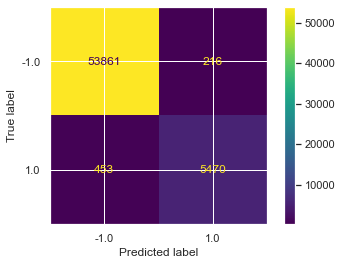

In [30]:
cm_display = ConfusionMatrixDisplay.from_predictions(
    y_train_0, y_hat_train_0, values_format='.5g')
    
plt.show()

In [31]:
cf_matrix = cm_display.confusion_matrix 
tn = cf_matrix[0,0]
fn = cf_matrix[1,0]
fp = cf_matrix[0,1]
tp = cf_matrix[1,1]

precision = tp/(tp+fp)
print('Precision : ', precision)

recall = tp/(tp+fn)
print('Recall : ', recall)

accuracy = (tn+tp)/(tn+tp+fn+fp)
print('Accuracy : ', accuracy)


Precision :  0.9620119591980303
Recall :  0.9235184872530812
Accuracy :  0.98885


Compare the precision and recall score obtained by the above method with that of the previous method (i.e. using `cross_validate`) 


In [32]:
print('Precision : {0:.4f}'.format(precision_score(y_train_0,y_hat_train_0))) 
print('Recall : {0:.4f}'.format(recall_score(y_train_0,y_hat_train_0)))

Precision : 0.9620
Recall : 0.9235


Finally, we can print all these scores as a report using the `classification_report` function

In [33]:
print(classification_report(y_train_0,y_hat_train_0))

              precision    recall  f1-score   support

        -1.0       0.99      1.00      0.99     54077
         1.0       0.96      0.92      0.94      5923

    accuracy                           0.99     60000
   macro avg       0.98      0.96      0.97     60000
weighted avg       0.99      0.99      0.99     60000



##### **3. Precision / Recall Tradeoff**

* Often time we need to make a trade off between precision and recall scores of a model.

* It depends on the problem at hand.

* It is important to note that we should **not** pass the **predicted labels** as input to `precision_recall_curve` function, instead we need to pass the probability scores or the output from the decision function!.

* The `Perceptron()` class contains a `decision_function` method, therefore we can make use of it.

* Then, internally the decision scores are sorted, **tps** and **fps** will be computed by changing the threshold from index[0] to index [-1].

* Let us compute the scores from decision function.

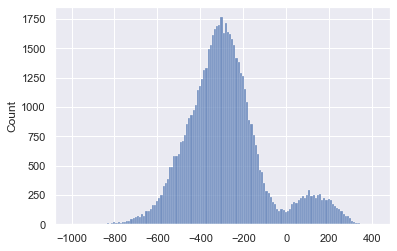

In [34]:
bin_clf = Perceptron(random_state=1729)
bin_clf.fit(X_train, y_train_0)
y_scores = bin_clf.decision_function(X_train)

sns.histplot(np.sort(y_scores))
plt.show()


The reason for so many negative values than the positives is : **Class-Imbalance**.

* Suppose threshold takes the value of -600, then all the samples having score greater than -600 is set to 1 ( +ve label ) and less than it is set to -1 ( -ve label ).

* Therefore, the number of False Positives will be increased. This will in turn reduce the precision score to a greater extent.

* On the otherhand, if the threshold takes the value of say 400, Then, the number of False negatives will be increase and hence the recall will reduce to a greater extent.


In [35]:
precisions, recalls, thresholds = precision_recall_curve(y_train_0,y_scores,pos_label=1)

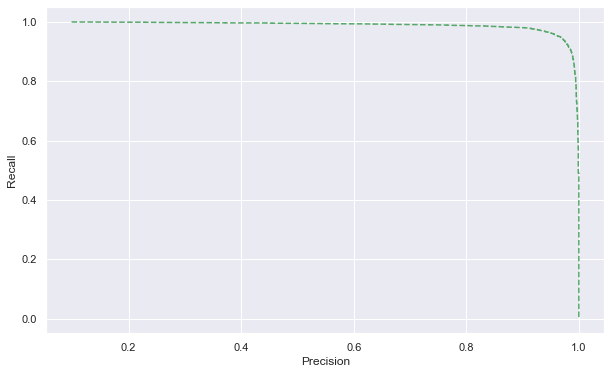

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(precisions[:-1], recalls[:-1], "g--")

plt.xlabel('Precision')
plt.ylabel('Recall')
plt.grid(True)
plt.show()

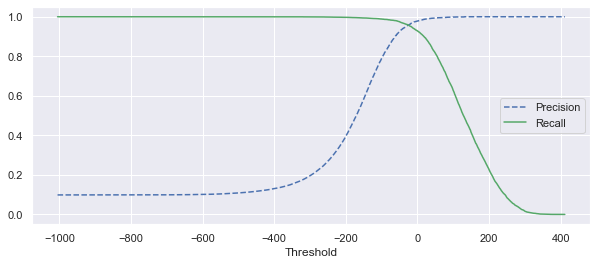

In [37]:
plt.figure(figsize=(10, 4))
plt.plot(thresholds, precisions[:-1], "b--", label='Precision')
plt.plot(thresholds, recalls[:-1], "g-", label='Recall')

plt.xlabel('Threshold')
plt.grid(True)
plt.legend(loc='best')
plt.show()

Getting the index of threshold around zero 

In [38]:
idx_th = np.where(np.logical_and(thresholds >0, thresholds <1))
print('Precision for zero threshold : ',precisions[idx_th[0][0]])

Precision for zero threshold :  0.9783072546230441


* **The solution** to the question of how can we increase the precision of the classifier by compromising the recall is we can make use of the above plot.

##### **4. ROC Curve**

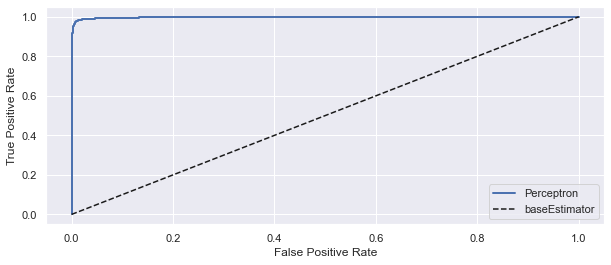

In [39]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_0, y_scores)
plt.figure(figsize=(10, 4))
plt.plot(fpr, tpr, linewidth=2, label='Perceptron')
plt.plot([0, 1], [0, 1], 'k--', label='baseEstimator')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.legend()
plt.show()


#### **Warm Start VS Cold Start**

##### **Cold Start**

* If we execute the `fit` method of `bin_clf` repeatedly, we get the same score for both training and testing accuracy.

* This because everytime the `fit` method is called, the model weights are initialized to the same values. Therefore, we obtain the same score.

* This is termed as **cold start**. 

Let's execute the following cell 4 times and observe the score.

In [40]:
bin_clf.fit(X_train, y_train_0)
y_hat_train_0 = bin_clf.predict(X_train)

print('Training Accuracy : ', bin_clf.score(X_train, y_train_0))
print('Test accuracy : ', bin_clf.score(X_test, y_test_0))

Training Accuracy :  0.99095
Test accuracy :  0.989


##### **Warm Start**

* Setting `warm_start=True` retains the weight values of the model after `max_iter` and hence produce different results for each execution.

* Warm starting is useful in many ways. It helps us train the model by initializing the weight values from the previous state. So, we can pause the training and resume it whenever we get the resource for computation.

* Of course, it is not required for simple models like perceptron and for a small dataset like **MNIST**.

* In this notebook, we use this feature to plot the iteratation vs loss curve.

Let us execute the following lines of code 4 times and observe how the training accuracy changes for each execution.

In [41]:
bin_clf_warm = Perceptron(max_iter=100,random_state=1729,warm_start=True)

In [42]:
bin_clf_warm.fit(X_train,y_train_0)
print('Training Accuracy : ', bin_clf_warm.score(X_train,y_train_0))

Training Accuracy :  0.99095


## **Multiclass Classification (OneVsAll)**

* We know that the perceptron is a binary classifier. However,
MNIST dataset contains 10 classes. So, we need to extend the idea to handle multi-class problem.

* **Solution** : Combining multiple binary classifiers and devise a suitable scoring metric.

* Sklearn makes it extremely easy without modifying a single line of code that we have written for the binary classifier.

* Sklearn does this by counting a number of unique elements (10 in this case) in the label vector `y_train` and converting labels using `Labelbinarizer` to fit each binary classifier.


In [43]:
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import LabelBinarizer

Let's use **Label binarizer** just to see the encoding.

In [44]:
y_train_ovr = LabelBinarizer().fit_transform(y_train)

for i in range(10):
    print('{0} : {1}'.format(y_train[i],y_train_ovr[i]))

5 : [0 0 0 0 0 1 0 0 0 0]
0 : [1 0 0 0 0 0 0 0 0 0]
4 : [0 0 0 0 1 0 0 0 0 0]
1 : [0 1 0 0 0 0 0 0 0 0]
9 : [0 0 0 0 0 0 0 0 0 1]
2 : [0 0 1 0 0 0 0 0 0 0]
1 : [0 1 0 0 0 0 0 0 0 0]
3 : [0 0 0 1 0 0 0 0 0 0]
1 : [0 1 0 0 0 0 0 0 0 0]
4 : [0 0 0 0 1 0 0 0 0 0]


* The `y_train_ovr` will be of size of size $60000 \times 10$.

* The first column will be (binary) label vector for 0-detector and the next one for 1-Detector and so on.

In [45]:
clf = Perceptron(random_state=1729)
clf.fit(X_train,y_train)

Perceptron(random_state=1729)

* What had actually happened internally was that the API automatically created 10 binary classifiers, converted labels to binary sparse matrix and trained them with the binarized labels.

* During the inference time, the input will be passed through all these 10 classifiers and the highest score among the output from the classifiers will be considered as the predicted class.

* To see it in action, let us execute the following lines of code.

In [46]:
print('Shape of Weight matrix : {0} and bias vector : {1}'.format(
    clf.coef_.shape, clf.intercept_.shape))

Shape of Weight matrix : (10, 784) and bias vector : (10,)


* So it is a matrix of size $ 10 \times 784 $, where each row represents the weights for a single binary classifier.

* Important difference to note is that there is no signum function associated with the perceptron.

* The class of a perceptron that outputs the maximum score for the input sample is considered as the predicted class.

In [47]:
for i in range(10):
    scores = clf.decision_function(X_train[i].reshape(1, -1))
    print(scores)
    print()
    print('The predicted class : ', np.argmax(scores))
    print()
    print('Predicted output : ')
    print(clf.predict(X_train[i].reshape(1, -1)))
    print('-'*20)

[[-281.59403306 -316.86757401 -163.89196463  -29.53201077 -360.15901576
    35.74422145 -281.75632449 -129.84598231 -269.37986928 -232.78886582]]

The predicted class :  5

Predicted output : 
['5']
--------------------
[[ 163.56542868 -383.99440215 -217.57545559 -208.67775471 -341.63012687
  -200.703391   -272.04836601 -265.31963091 -205.48413687 -254.29404075]]

The predicted class :  0

Predicted output : 
['0']
--------------------
[[-333.95381776 -222.07201845 -112.63298731  -31.12224529   41.19340254
  -231.70143791 -294.13151865 -140.55028066 -336.50911188 -242.68656671]]

The predicted class :  4

Predicted output : 
['4']
--------------------
[[-246.03221838   87.48547482  -63.78459054  -88.46945021 -171.87637063
  -160.67975394 -243.45420992 -158.6293887  -130.2792772  -255.97957709]]

The predicted class :  1

Predicted output : 
['1']
--------------------
[[-361.45457901 -208.39195694 -322.6535025  -227.38734333 -109.59223376
  -165.16824298 -231.39936947 -134.96336794 -141

Get the prediction for all training samples.

In [48]:
y_hat = clf.predict(X_train)

Lets display the classification report.

In [49]:
print(classification_report(y_train,y_hat))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      5923
           1       0.94      0.98      0.96      6742
           2       0.89      0.90      0.90      5958
           3       0.86      0.87      0.87      6131
           4       0.89      0.94      0.91      5842
           5       0.81      0.88      0.85      5421
           6       0.92      0.97      0.94      5918
           7       0.91      0.94      0.92      6265
           8       0.92      0.77      0.84      5851
           9       0.92      0.82      0.87      5949

    accuracy                           0.90     60000
   macro avg       0.90      0.90      0.90     60000
weighted avg       0.91      0.90      0.90     60000



Now let us display the confusion matrix and relate it with the report above.

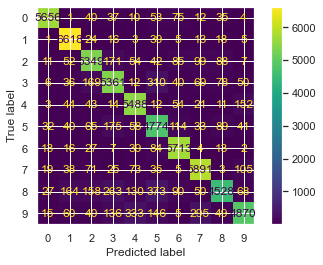

In [50]:
cm_display = ConfusionMatrixDisplay.from_predictions(
    y_train, y_hat, values_format='.5g') 

#### **Making a Pipeline**

* Let's create a pipeline to keep the code compact.

* Recall that, the **MNIST** dataset is clean and hence doesn't require much preprocessing.

* The one potential preprocessing technique we may use is to scale the features within the range(0,1).

* It is **not** similar to scaling down the range values between 0 and 1.

In [51]:
# create a list with named tuples
estimators = [('scaler', MinMaxScaler()), ('bin_clf', Perceptron())]
pipe = Pipeline(estimators)

In [52]:
pipe.fit(X_train,y_train_0)

Pipeline(steps=[('scaler', MinMaxScaler()), ('bin_clf', Perceptron())])

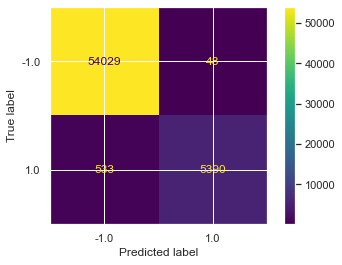

In [53]:
y_hat_train_0 = pipe.predict(X_train)

cm_display = ConfusionMatrixDisplay.from_predictions(
    y_train_0, y_hat_train_0, values_format='.5g')
plt.show()

#### **Iteration vs Loss Curve**

The other way of plotting **Iteration Vs Loss Curve** with the `Partial_fit` method.

In [19]:
iter = 100 
bin_clf1 = Perceptron(max_iter=100,random_state=2094)
loss_clf1=[]

for i in range(iter):
    bin_clf1.partial_fit(X_train,y_train_0,classes=np.array([1,-1])) 
    y_hat_0 = bin_clf1.decision_function(X_train)
    loss_clf1.append(hinge_loss(y_train_0,y_hat_0))

NameError: name 'Perceptron' is not defined

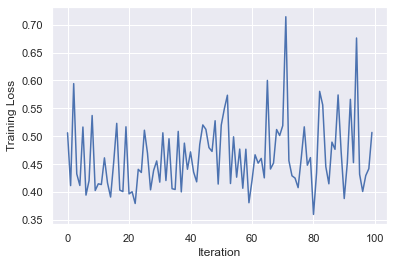

In [55]:
plt.figure()
plt.plot(np.arange(iter), loss_clf1)

plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('Training Loss')
plt.show()

#### **GridSearchCV**

* So, far we didn't perform any hyperparameter tuning & just accepted the default value for learning rate of the Perceptron class.

* Now, let us search for a better learning rate using `GridSearchCV`.

* No matter what the learning rate is, the loss will never converge to zero as the classes are not linearly separable.

In [56]:
from sklearn.metrics import make_scorer

scoring = make_scorer(hinge_loss,greater_is_better=False)
lr_grid = [1/2**n for n in range(1,6)]

bin_clf_gscv = GridSearchCV(Perceptron(), param_grid={'eta0':lr_grid},scoring=scoring, cv=5)
bin_clf_gscv.fit(X_train,y_train_0) 

GridSearchCV(cv=5, estimator=Perceptron(),
             param_grid={'eta0': [0.5, 0.25, 0.125, 0.0625, 0.03125]},
             scoring=make_scorer(hinge_loss, greater_is_better=False))

In [57]:
bin_clf_gscv.cv_results_

{'mean_fit_time': array([0.89319444, 0.88571563, 0.85104909, 0.73002439, 0.69517179]),
 'std_fit_time': array([0.19984267, 0.19527222, 0.17349208, 0.09260067, 0.04365529]),
 'mean_score_time': array([0.01677132, 0.01518822, 0.01427217, 0.01503611, 0.01647668]),
 'std_score_time': array([0.00137195, 0.0027181 , 0.00307773, 0.003333  , 0.00319911]),
 'param_eta0': masked_array(data=[0.5, 0.25, 0.125, 0.0625, 0.03125],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'eta0': 0.5},
  {'eta0': 0.25},
  {'eta0': 0.125},
  {'eta0': 0.0625},
  {'eta0': 0.03125}],
 'split0_test_score': array([-0.02166667, -0.02166667, -0.02166667, -0.02166667, -0.02166667]),
 'split1_test_score': array([-0.0395, -0.0395, -0.0395, -0.0395, -0.0395]),
 'split2_test_score': array([-0.02816667, -0.02816667, -0.02816667, -0.02816667, -0.02816667]),
 'split3_test_score': array([-0.023     , -0.023     , -0.023     , -0.04416667, -0.04416667]),
 '

Well, instead of instantiating a Perceptron class with a new learning rate and re-train the model, we could simply get the `best_estimator` from `GridSearchCV` as follows.

In [58]:
best_bin_clf = bin_clf_gscv.best_estimator_
best_bin_clf

Perceptron(eta0=0.125)

We can observe that the best learning rate is **0.125**.

In [59]:
iter = 100
loss = []
best_bin_clf = Perceptron(max_iter=1000,random_state=2094,eta0=0.125)

for i in range(iter):
    best_bin_clf.partial_fit(X_train, y_train_0, classes=np.array([1,-1]))
    y_hat_0 = best_bin_clf.decision_function(X_train)
    loss.append(hinge_loss(y_train_0,y_hat_0))

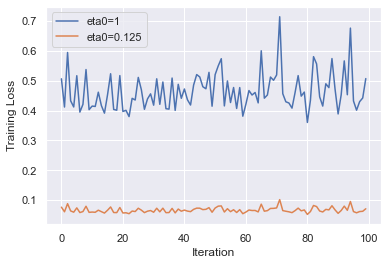

In [60]:
plt.figure()
plt.plot(np.arange(iter), loss_clf1, label='eta0=1')
plt.plot(np.arange(iter), loss, label='eta0=0.125')

plt.grid(True)
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Training Loss')
plt.show()

In [61]:
y_hat_train_0 = bin_clf.predict(X_train)
print(classification_report(y_train_0, y_hat_train_0))

              precision    recall  f1-score   support

        -1.0       0.99      1.00      0.99     54077
         1.0       0.98      0.93      0.95      5923

    accuracy                           0.99     60000
   macro avg       0.99      0.96      0.97     60000
weighted avg       0.99      0.99      0.99     60000



Now, compare this classification report with the one when **eta0 = 1**

#### **Visualizing weight vectors** (Optional)

It will be interesting to look into the samples which are misclassified as False Positives (that is, images that are not zero but classified as zero).

In [62]:
# repeating the code for readability
bin_clf = Perceptron(max_iter=100)
bin_clf.fit(X_train, y_train_0)
y_hat_train_0 = bin_clf.predict(X_train)

In [63]:
# index of true -ve samples
idx_n = np.where(y_train_0==-1) 

# index of predicted positive samples
idx_pred_p = np.where(y_hat_train_0==1) 

# index of predicted negative samples
idx_pred_n = np.where(y_hat_train_0==-1) 

idx_fp = np.intersect1d(idx_n, idx_pred_p) 
idx_tn = np.intersect1d(idx_n,idx_pred_p)

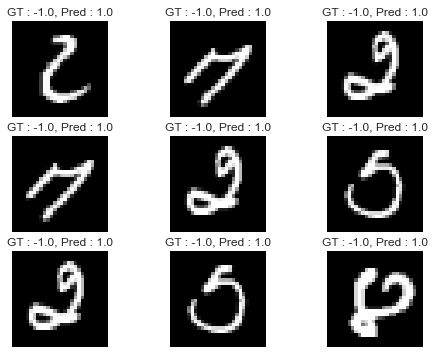

In [64]:
fig, ax = plt.subplots(nrows=factor, ncols=factor, figsize=(8,6))
idx_offset = 0 

for i in range(3):
    index = idx_offset + i
    for j in range(3):
        ax[i,j].imshow(X_train[idx_fp[index+j]].reshape(28,28),cmap='gray') 
        
        # we should not use x_train_with_dummy 

        # GT : ground truth ; Pred : predicted
        ax[i,j].set_title('GT : {0}, Pred : {1}'.format(str(y_train_0[idx_fp[index+j]]),str(y_hat_train_0[idx_fp[index+j]])))

        ax[i,j].set_axis_off() 

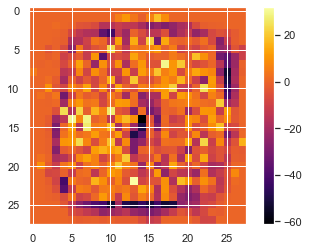

In [65]:
from matplotlib.colors import Normalize

w = bin_clf.coef_
w_matrix = w.reshape(28, 28)
#fig = plt.figure()
#plt.imshow(w_matrix, cmap='magma')
#plt.imshow(w_matrix, cmap='cividis')
#plt.imshow(w_matrix, cmap='viridis')
#plt.imshow(w_matrix, cmap='gray')
plt.imshow(w_matrix, cmap='inferno')

#plt.axis(False)
plt.rcParams['axes.grid'] = False
plt.colorbar()
plt.show()

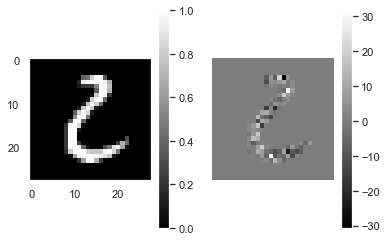

In [70]:
#print(idx_fp.shape)

activation = w * X_train[idx_fp[0]].reshape(1, -1)
lin_out = activation.reshape(28, 28)
plt.subplot(1, 2, 1)
plt.imshow(X_train[idx_fp[0]].reshape(28, 28), cmap='gray')
plt.colorbar()

#lin_out[lin_out < 0]=0 # just set the value less than zero to zero

plt.subplot(1, 2, 2)
plt.imshow(lin_out, cmap='gray')
plt.colorbar()
plt.grid(False)
plt.axis(False)
plt.show()


Input to the signum

In [69]:
print(np.sum(lin_out)+bin_clf.intercept_)

[352.4343714]


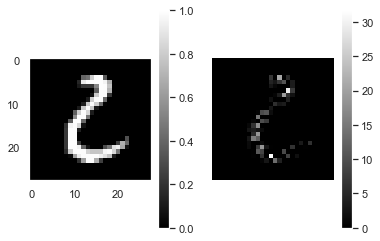

In [68]:
activation = w*(X_train[idx_tn[0]].reshape(1, -1))
lin_out = activation.reshape(28, 28)

plt.subplot(1, 2, 1)
plt.imshow(X_train[idx_tn[0]].reshape(28, 28), cmap='gray')
plt.colorbar()

# just set the value less than zero to zero
lin_out[lin_out < 0] = 0  
plt.subplot(1, 2, 2)
plt.imshow(lin_out, cmap='gray')

plt.colorbar()
plt.grid(False)
plt.axis(False)
plt.show()

Input to the signum

In [ ]:
print(np.sum(lin_out) + bin_clf.intercept_)

[352.4343714]


In [ ]:
bb

In [58]:
# Import the necessary libraries
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [59]:
# Load the 20 newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

In [64]:
print(newsgroups.data[0])
print(newsgroups.target[1])
print(len(newsgroups.target_names))



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!


3
20


In [57]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(newsgroups.data, newsgroups.target, test_size=0.25, random_state=42)



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!


3
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.rel

In [65]:
# Create a TfidfVectorizer to convert text data into TF-IDF vectors
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
print(X_train_tfidf)
# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Create and train a Multinomial Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)

# Predict the categories on the testing data
y_pred = clf.predict(X_test_tfidf)

# Evaluate the performance of the classifier
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# You can also print other classification metrics like precision, recall, and F1-score if needed
print(metrics.classification_report(y_test, y_pred, target_names=newsgroups.target_names))

  (0, 1558)	0.14870949515746465
  (0, 2731)	0.6196877396705656
  (0, 61)	0.3052079036267011
  (0, 1474)	0.24284330683178756
  (0, 2445)	0.27294958215005083
  (0, 2410)	0.06283462658203054
  (0, 3182)	0.08343978804968324
  (0, 700)	0.2163814643726008
  (0, 821)	0.18668434746194218
  (0, 1823)	0.20774734730972058
  (0, 2123)	0.24668332231005957
  (0, 1407)	0.14022355635882613
  (0, 2164)	0.2788146412486622
  (0, 4489)	0.05007272368704881
  (0, 3152)	0.07589446219173952
  (0, 3213)	0.10696383273243097
  (0, 1549)	0.23139496168626744
  (1, 4284)	0.16491707028512653
  (1, 2170)	0.0910772613692774
  (1, 4911)	0.05354455323113276
  (1, 2430)	0.09873447489748943
  (1, 4441)	0.14992380405803482
  (1, 4176)	0.07175820051800952
  (1, 2001)	0.10827499732627655
  (1, 727)	0.15380349401352428
  :	:
  (14133, 4504)	0.09845794195131508
  (14133, 4856)	0.031890547821339245
  (14133, 4501)	0.19665867881354776
  (14133, 4840)	0.02997848674444223
  (14133, 4517)	0.042012138593130424
  (14133, 684)	0.08297